# Statistics - Linear Regression

---

## Setup 

The model is given as:

$$
\begin{align*}
y &= X w + \epsilon & \text{(model)} \\
X &\in \mathbb{R}^{n \times p} & \text{(design matrix)} \\
w &\in \mathbb{R}^{p \times 1} & \text{(parameters)} \\
y &\in \mathbb{R}^{n \times 1} & \text{(response)} \\
\epsilon &\sim \mathcal{N}(0, \sigma^2 I_n) & \text{(Gaussian errors)}
\end{align*}

## Ordinary Least Squares

Ordinary Least Squares (OLS) is a method that estimates linear regression parameters by minimizing the sum of squared residuals between observed and predicted values.

Equivalently: find weights $\hat{w}$ that minimize sum of squared errors $(\text{SSE})$:

$$
\begin{align*}
\hat{w} &= \ell({w}) \\
&= \argmin_w \|y - Xw\|^2 \\
&= \argmin_w \sum_{i=1}^n (y_i - x_i^\top w)^2 \\
&= \argmin_w \, (y - Xw)^\top (y - Xw) \\
&= \argmin_w \, y^\top y - 2w^\top X^\top y + w^\top X^\top X w \\
\end{align*}
$$

Partially differentiate with respect to $w$ and set to 0:
$$
\begin{align*}
0 &= \frac{\partial \ell}{\partial w}  \\
0 &= -2X^\top y + 2X^\top X w \\
0 &= 2X^\top (Xw - y) \\
X^\top X w &= X^\top y \\
\hat{w} &:= (X^\top X)^{-1} X^\top y
\end{align*}
$$

## Maximum Likelihood Estimation 

Key assumption - assume Gaussian errors. The model is given by:

$$y = Xw + \epsilon , \quad \epsilon \sim \mathcal{N}(\mathbf{0}, \sigma^2 I_n)$$

The likelihood and log-likelihood is given by:
$$
\begin{align*}
p(y | w, \sigma^2) &= (2\pi \sigma^2)^{-\frac{n}{2}} \exp\left( -\frac{1}{2\sigma^2} (y - Xw)^\top (y - Xw) \right) \\
\ell(w, \sigma^2) &= -\frac{n}{2} \log(2\pi \sigma^2) - \frac{1}{2\sigma^2} (y - Xw)^\top (\mathbf{y} - Xw)
\end{align*}
$$

Derivation of $\hat{w}$ remains the same:

$$
\begin{align*}
\frac{\partial \ell}{\partial w} &= \frac{1}{\sigma^2} (X^\top y - X^\top X w) = 0 \\
X^\top X w &= X^\top y \\
\hat{w} &:= (X^\top X)^{-1} X^\top y
\end{align*}
$$

We also have an estimate of $\hat{\sigma}$:

$$
\begin{align*}
\frac{\partial \ell}{\partial \sigma^2} &= -\frac{n}{2\sigma^2} + \frac{(y - X\hat{w})^\top (y - X\hat{w}) }{2(\sigma^2)^2} = 0\\
\hat{\sigma}^2 &= \frac{(y - X\hat{w})^\top (y - X\hat{w})}{n} \\ 
\hat{\sigma}^2 &:= \frac{1}{n} (y - X\hat{w})^\top (y - X\hat{w})
\end{align*}
$$

In [48]:
import logging

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [66]:
log = logging.getLogger(__name__)
log.setLevel(logging.INFO)
if not log.hasHandlers():
    handler = logging.StreamHandler()
    handler.setFormatter(logging.Formatter("[%(asctime)s] [%(levelname)s] %(message)s"))
    log.addHandler(handler)

In [67]:
np.random.seed(42)

## Implementation

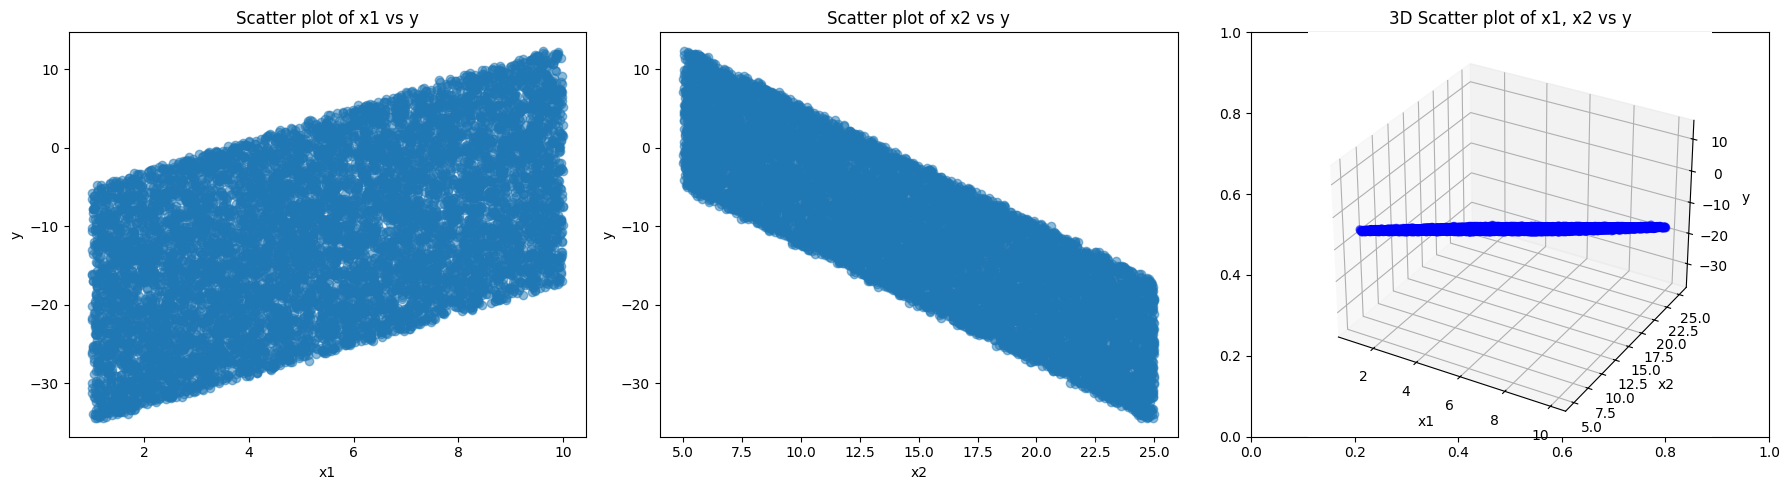

In [58]:
n_samples = int(1e4)

# Simple features: x1, x2
x0 = np.ones(n_samples)
x1 = np.random.uniform(1, 10, n_samples)
x2 = np.random.uniform(5, 25, n_samples)

# TRUE model
true_w = np.array([2.0, -1.5])
X = np.c_[x0, x1, x2]

# Generate target with some noise
y = X @ np.r_[0.5, true_w] + 0.2 * np.random.randn(n_samples)

# Plot the data
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].scatter(x1, y, alpha=0.5)
axs[0].set_xlabel("x1")
axs[0].set_ylabel("y")
axs[0].set_title("Scatter plot of x1 vs y")
axs[1].scatter(x2, y, alpha=0.5)

axs[1].set_xlabel("x2")
axs[1].set_ylabel("y")
axs[1].set_title("Scatter plot of x2 vs y")

axs[2] = fig.add_subplot(1, 3, 3, projection="3d")
axs[2].scatter(x1, x2, y, c="blue", alpha=0.5, s=30)
axs[2].set_xlabel("x1")
axs[2].set_ylabel("x2")
axs[2].set_zlabel("y")
axs[2].set_title("3D Scatter plot of x1, x2 vs y")

plt.tight_layout()
plt.show()

In [59]:
# Fit using Normal Equation
w = np.linalg.inv(X.T @ X) @ X.T @ y

# Predictions
y_pred = X @ w

# Compare with sklearn
model = LinearRegression()
model.fit(X, y)
y_sklearn = model.predict(X)

log.info(f"Manual Estimated coefficients: {np.round(w, 3)}")
log.info(
    f"Sklearn Estimated coefficients: {np.round(np.r_[model.intercept_, model.coef_[1:]], 3)}"
)
log.info(f"True coefficients: {np.round(np.r_[0.5, true_w], 3)}")

[2025-12-05 04:30:48,928] [INFO] Manual Estimated coefficients: [ 0.511  1.999 -1.5  ]
[2025-12-05 04:30:48,929] [INFO] Sklearn Estimated coefficients: [ 0.511  1.999 -1.5  ]
[2025-12-05 04:30:48,929] [INFO] True coefficients: [ 0.5  2.  -1.5]


In [60]:
rmse = np.sqrt(np.mean((y - y_pred) ** 2))
r_sq = 1 - np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2)

log.info(f"RMSE on training data: {rmse:.4f}")
log.info(f"R-squared on training data: {r_sq:.4f}")

[2025-12-05 04:30:48,948] [INFO] RMSE on training data: 0.1978
[2025-12-05 04:30:48,949] [INFO] R-squared on training data: 0.9996


## Assumptions

TODO